In [29]:
import numpy as np
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,15)
import seaborn as sns

<ipython-input-29-4c73d4f7bfab>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [30]:
melbourne = pd.read_csv('/content/daily-minimum-temperatures-in-me.csv', header=0, index_col=0, squeeze=True, parse_dates=True, on_bad_lines='warn')

<ipython-input-30-ca05d350c3c3>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  melbourne = pd.read_csv('/content/daily-minimum-temperatures-in-me.csv', header=0, index_col=0, squeeze=True, parse_dates=True, on_bad_lines='warn')
Skipping line 3653: expected 2 fields, saw 3



In [31]:
melbourne.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: object

In [32]:
melbourne = melbourne.apply(lambda x:x.replace('?', ''))
melbourne = melbourne.astype(float)

In [33]:
df = pd.DataFrame()
df['Month'] = [melbourne.index[i].month for i in range(len(melbourne))]
df['Day'] = [melbourne.index[i].day for i in range(len(melbourne))]
df['Temp'] = [melbourne[i] for i in range(len(melbourne))]
df.head()

,Month,Day,Temp
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8


In [34]:
df.isnull().sum()

Month    0
Day      0
Temp     0
dtype: int64

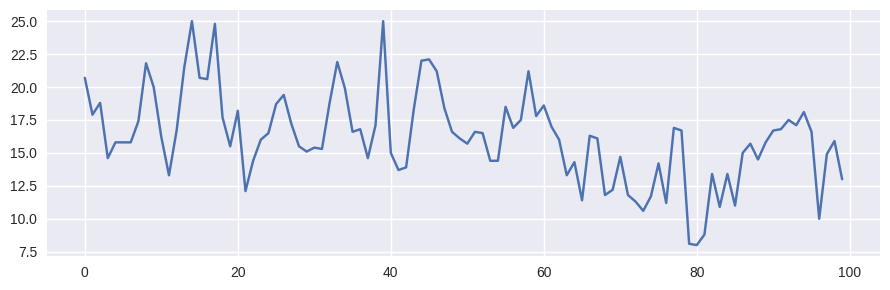

In [35]:
plt.figure(figsize=(9,3))
plt.plot(df.Temp[:100])
plt.tight_layout()

In [36]:
df.drop(['Month','Day'], inplace=True, axis=1)
df

,Temp
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3645,14.0
3646,13.6
3647,13.5
3648,15.7


In [37]:
df = pd.concat([df.shift(1),df], axis=1)
df.columns=['t', 't+1']
df

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
...,...,...
3645,14.6,14.0
3646,14.0,13.6
3647,13.6,13.5
3648,13.5,15.7


In [38]:
df = pd.concat([df['t+1'].shift(3), df['t+1'].shift(2), df], axis=1)
df

,t+1,t+1,t,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8
...,...,...,...,...
3645,10.0,12.9,14.6,14.0
3646,12.9,14.6,14.0,13.6
3647,14.6,14.0,13.6,13.5
3648,14.0,13.6,13.5,15.7


In [39]:
df.columns = ['t-2', 't-1', 't', 't+1']

In [40]:
df

,t-2,t-1,t,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8
...,...,...,...,...
3645,10.0,12.9,14.6,14.0
3646,12.9,14.6,14.0,13.6
3647,14.6,14.0,13.6,13.5
3648,14.0,13.6,13.5,15.7


In [41]:
df.iloc[566]

t-2    3.9
t-1    5.2
t      0.2
t+1    0.8
Name: 566, dtype: float64

In [42]:
means = df['t+1'].rolling(2).mean()

In [43]:
df = pd.concat([df, means], axis=1)

In [44]:
df.columns = ['t-2', 't-1', 't', 't+1', 'Mean(t-1,t)']
df

,t-2,t-1,t,t+1,"Mean(t-1,t)"
0,NaN,NaN,NaN,20.7,NaN
1,NaN,NaN,20.7,17.9,19.30
2,NaN,20.7,17.9,18.8,18.35
3,20.7,17.9,18.8,14.6,16.70
4,17.9,18.8,14.6,15.8,15.20
...,...,...,...,...,...
3645,10.0,12.9,14.6,14.0,14.30
3646,12.9,14.6,14.0,13.6,13.80
3647,14.6,14.0,13.6,13.5,13.55
3648,14.0,13.6,13.5,15.7,14.60


In [45]:
temps = df['t+1']
width = 2
window = temps.rolling(width)
df = pd.concat([df, window.max(), window.min()], axis=1)

In [46]:
df.columns = ['t-2', 't-1', 't', 't+1', 'Mean(t-1,t)', 'Max', 'Min']

In [47]:
df

,t-2,t-1,t,t+1,"Mean(t-1,t)",Max,Min
0,NaN,NaN,NaN,20.7,NaN,NaN,NaN
1,NaN,NaN,20.7,17.9,19.30,20.7,17.9
2,NaN,20.7,17.9,18.8,18.35,18.8,17.9
3,20.7,17.9,18.8,14.6,16.70,18.8,14.6
4,17.9,18.8,14.6,15.8,15.20,15.8,14.6
...,...,...,...,...,...,...,...
3645,10.0,12.9,14.6,14.0,14.30,14.6,14.0
3646,12.9,14.6,14.0,13.6,13.80,14.0,13.6
3647,14.6,14.0,13.6,13.5,13.55,13.6,13.5
3648,14.0,13.6,13.5,15.7,14.60,15.7,13.5


In [48]:
temps = pd.DataFrame(melbourne.values)
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = [ ' min ' , ' mean ' , ' max ' , ' t+1 ' ]

In [50]:
dataframe

,min,mean,max,t+1
0,20.7,20.700000,20.7,17.9
1,17.9,19.300000,20.7,18.8
2,17.9,19.133333,20.7,14.6
3,14.6,18.000000,20.7,15.8
4,14.6,17.560000,20.7,15.8
...,...,...,...,...
3645,0.0,11.174712,26.3,13.6
3646,0.0,11.175377,26.3,13.5
3647,0.0,11.176014,26.3,15.7
3648,0.0,11.177254,26.3,13.0
